# Ecommerce 

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [35]:
df = pd.read_csv('Ecommerce Customers.csv')

In [36]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [37]:
df.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [38]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [40]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


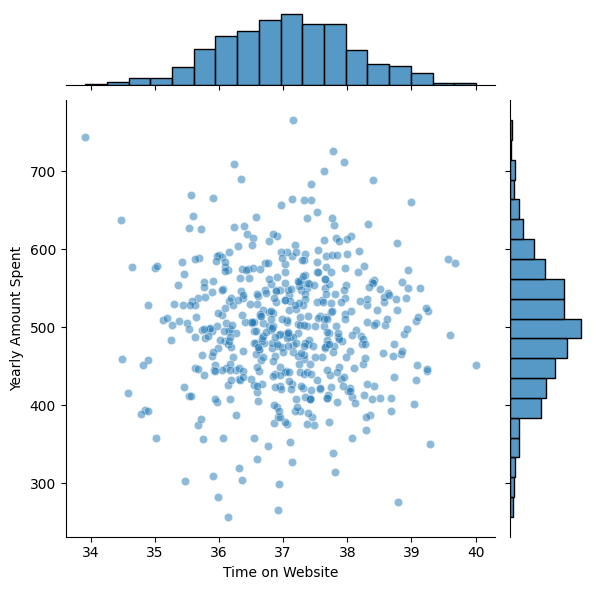

In [41]:
#alpha shows theo opacity of the points
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=df, alpha=0.5)

In [42]:
numerical_cols = ['Time on App', 'Time on Website', 'Length of Membership', 'Yearly Amount Spent']


In [43]:
correlation = df[numerical_cols].corr()

<Axes: >

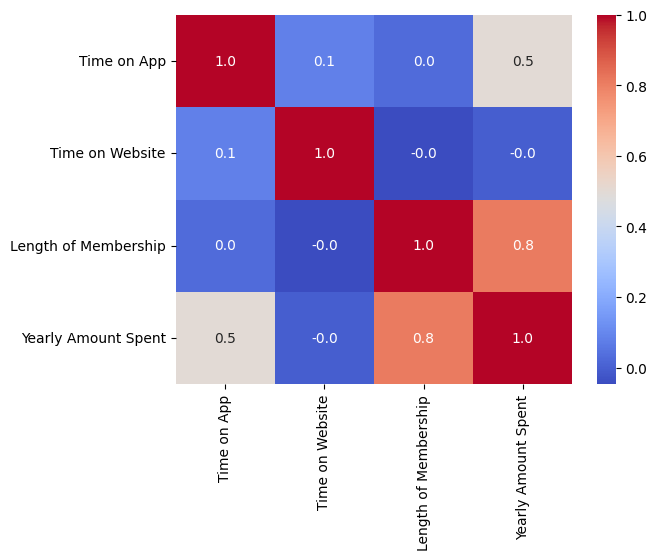

In [44]:
sns.heatmap(correlation, annot=True, cmap='coolwarm', cbar=True, fmt ='.1f')

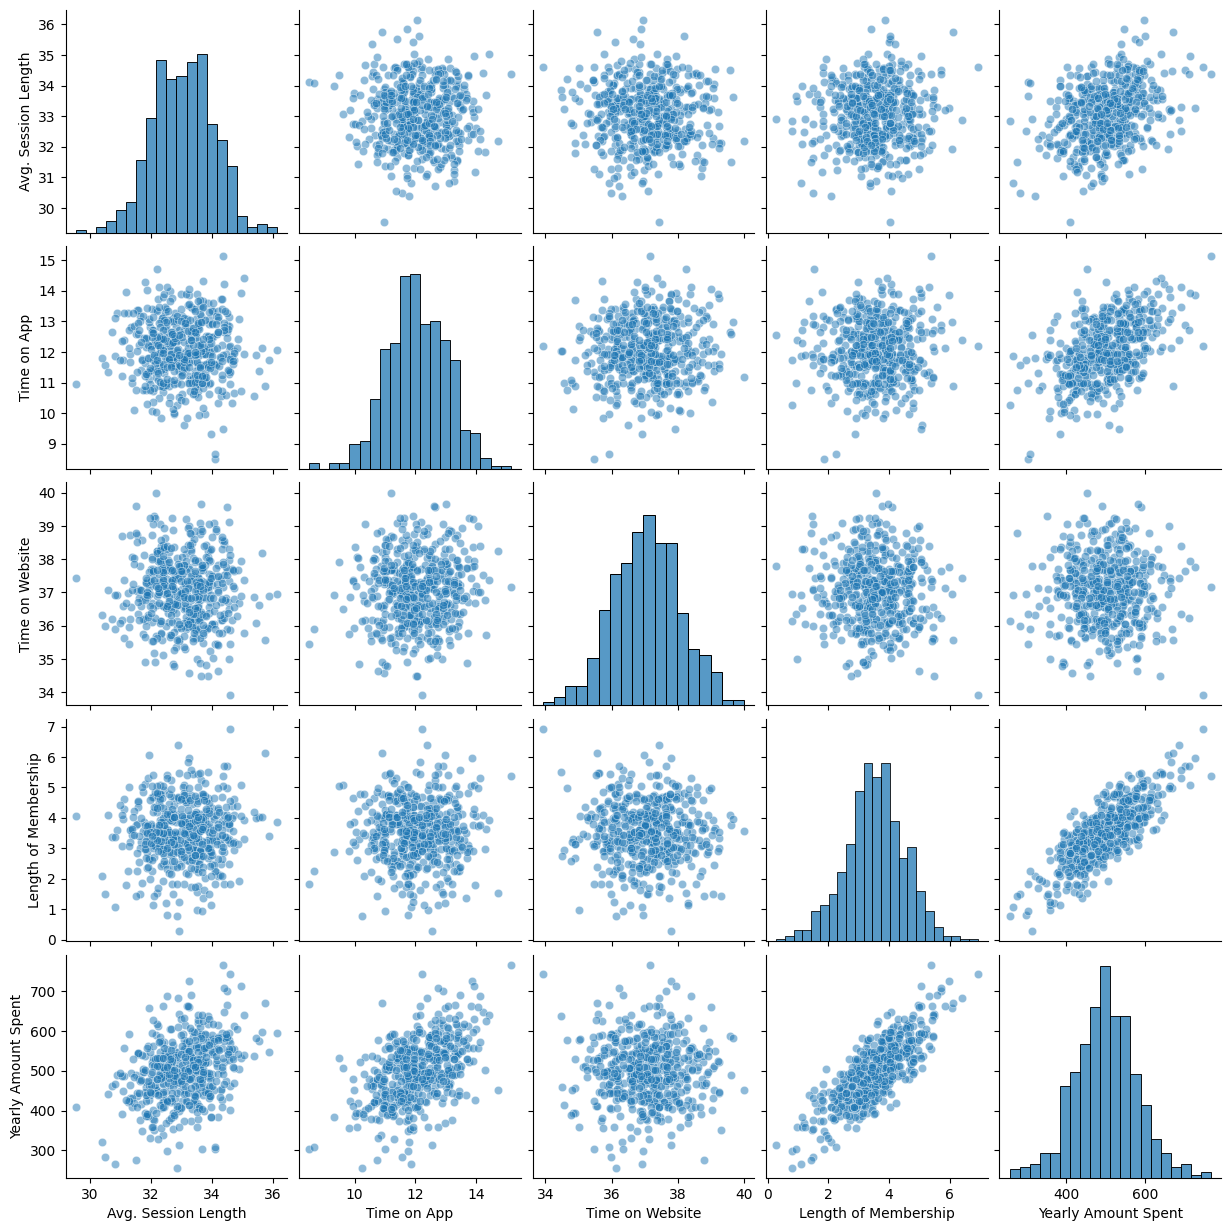

In [45]:
#relation between all the numerical columns
#THE BEST WAY TO DO THIS
sns.pairplot(df, kind='scatter', plot_kws={'alpha':0.5})

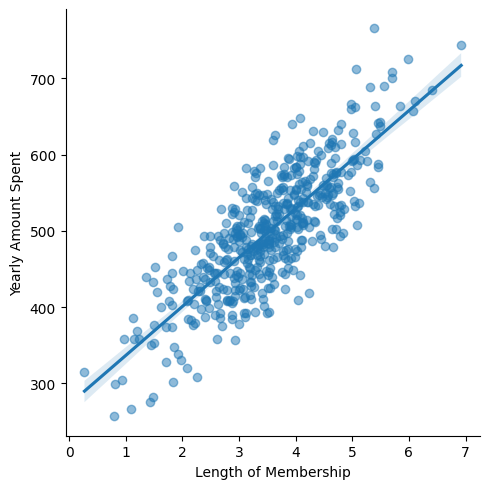

In [46]:
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=df, scatter_kws={'alpha':0.5})

In [47]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
Y = df['Yearly Amount Spent']   

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=442)

In [51]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((350, 4), (150, 4), (350,), (150,))

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
model = LinearRegression()

In [54]:
model.fit(X_train, Y_train)

LinearRegression()

In [55]:
#this shows how much each is important for our dataset
#they are the weights 'w' written on my notes
model.coef_

array([26.57343557, 38.67490407,  0.50264299, 61.21941685])

In [56]:
coef = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coef

,Coefficient
Avg. Session Length,26.573436
Time on App,38.674904
Time on Website,0.502643
Length of Membership,61.219417


In [57]:
pred = model.predict(X_test)
pred

array([544.49862236, 459.9429274 , 500.19769626, 606.69199214,
       469.97513679, 499.07783808, 556.32060689, 604.08972603,
       458.91762169, 517.03984546, 483.77588829, 394.64941264,
       608.27623064, 458.81320568, 426.62083895, 538.53343036,
       529.64566651, 424.39524   , 315.09572854, 550.58384043,
       487.52765907, 564.18644164, 476.2456172 , 623.9877212 ,
       430.81784494, 325.16237709, 464.5063752 , 534.65442207,
       523.20051764, 496.83387928, 491.67927265, 505.09384845,
       573.06883987, 600.63878643, 480.35415944, 576.46412242,
       514.37723814, 586.14409047, 459.97960585, 569.1397863 ,
       557.02283912, 422.59731196, 445.50431264, 496.75564596,
       512.32908572, 555.0657772 , 366.73353206, 282.18238358,
       683.67108013, 425.06628023, 504.17101936, 564.62012074,
       435.0474386 , 443.47132817, 472.7268851 , 395.21449582,
       511.83673006, 752.47507616, 513.28489319, 544.37095898,
       486.4755079 , 614.54632369, 460.09933248, 577.40

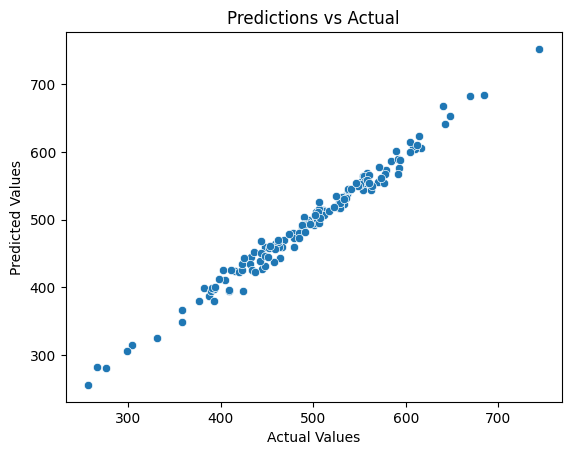

In [65]:
sns.scatterplot(x=Y_test, y=pred) 
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predictions vs Actual')
plt.show()

In [66]:
from sklearn import metrics

In [73]:
score1 = metrics.mean_absolute_error(Y_test, pred)
score2 = metrics.mean_squared_error(Y_test, pred)
score3 = np.sqrt(metrics.mean_squared_error(Y_test, pred))

In [74]:
print(score1)
print(score2)
print(score3)

7.7972526048240285
97.27781956317425
9.862951868643295


In [76]:
residual = Y_test - pred
residual

266     9.504471
31    -12.255021
210    -3.643615
60     10.159531
127    -1.529400
         ...    
270    -3.705035
54      4.190098
412   -23.979228
390    -7.712716
112   -17.962630
Name: Yearly Amount Spent, Length: 150, dtype: float64

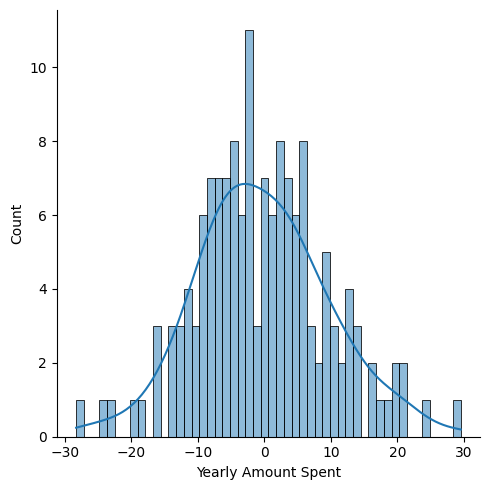

In [ ]:
#shows normal distribution or not
sns.displot(residual, bins=50, kde=True)